In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:/Data/Algorithms/DATA/mushrooms.csv')

Attribute Information:

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
bruises?: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Visualization

<AxesSubplot:xlabel='class', ylabel='count'>

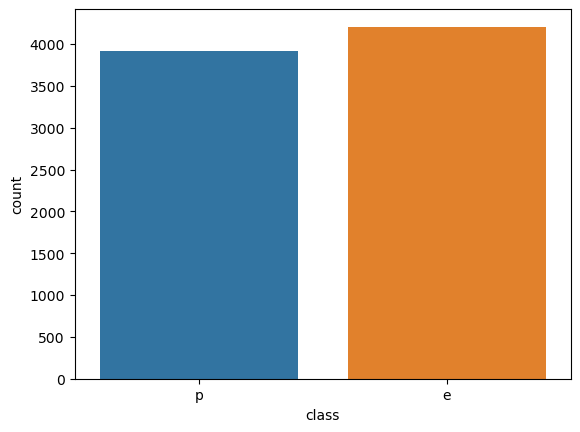

In [18]:
sns.countplot(data=df,x='class')

<AxesSubplot:xlabel='habitat', ylabel='count'>

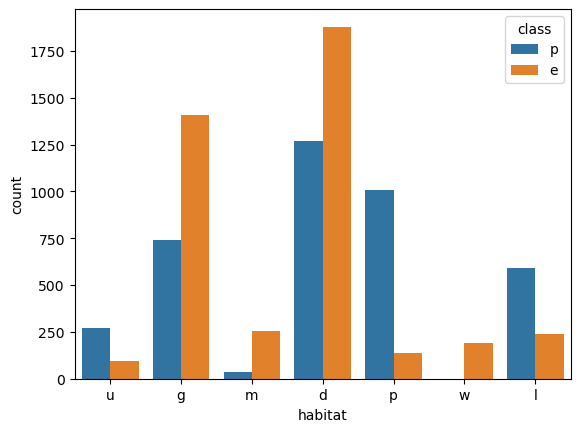

In [88]:
sns.countplot(data=df,x='habitat',hue='class')

In [20]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


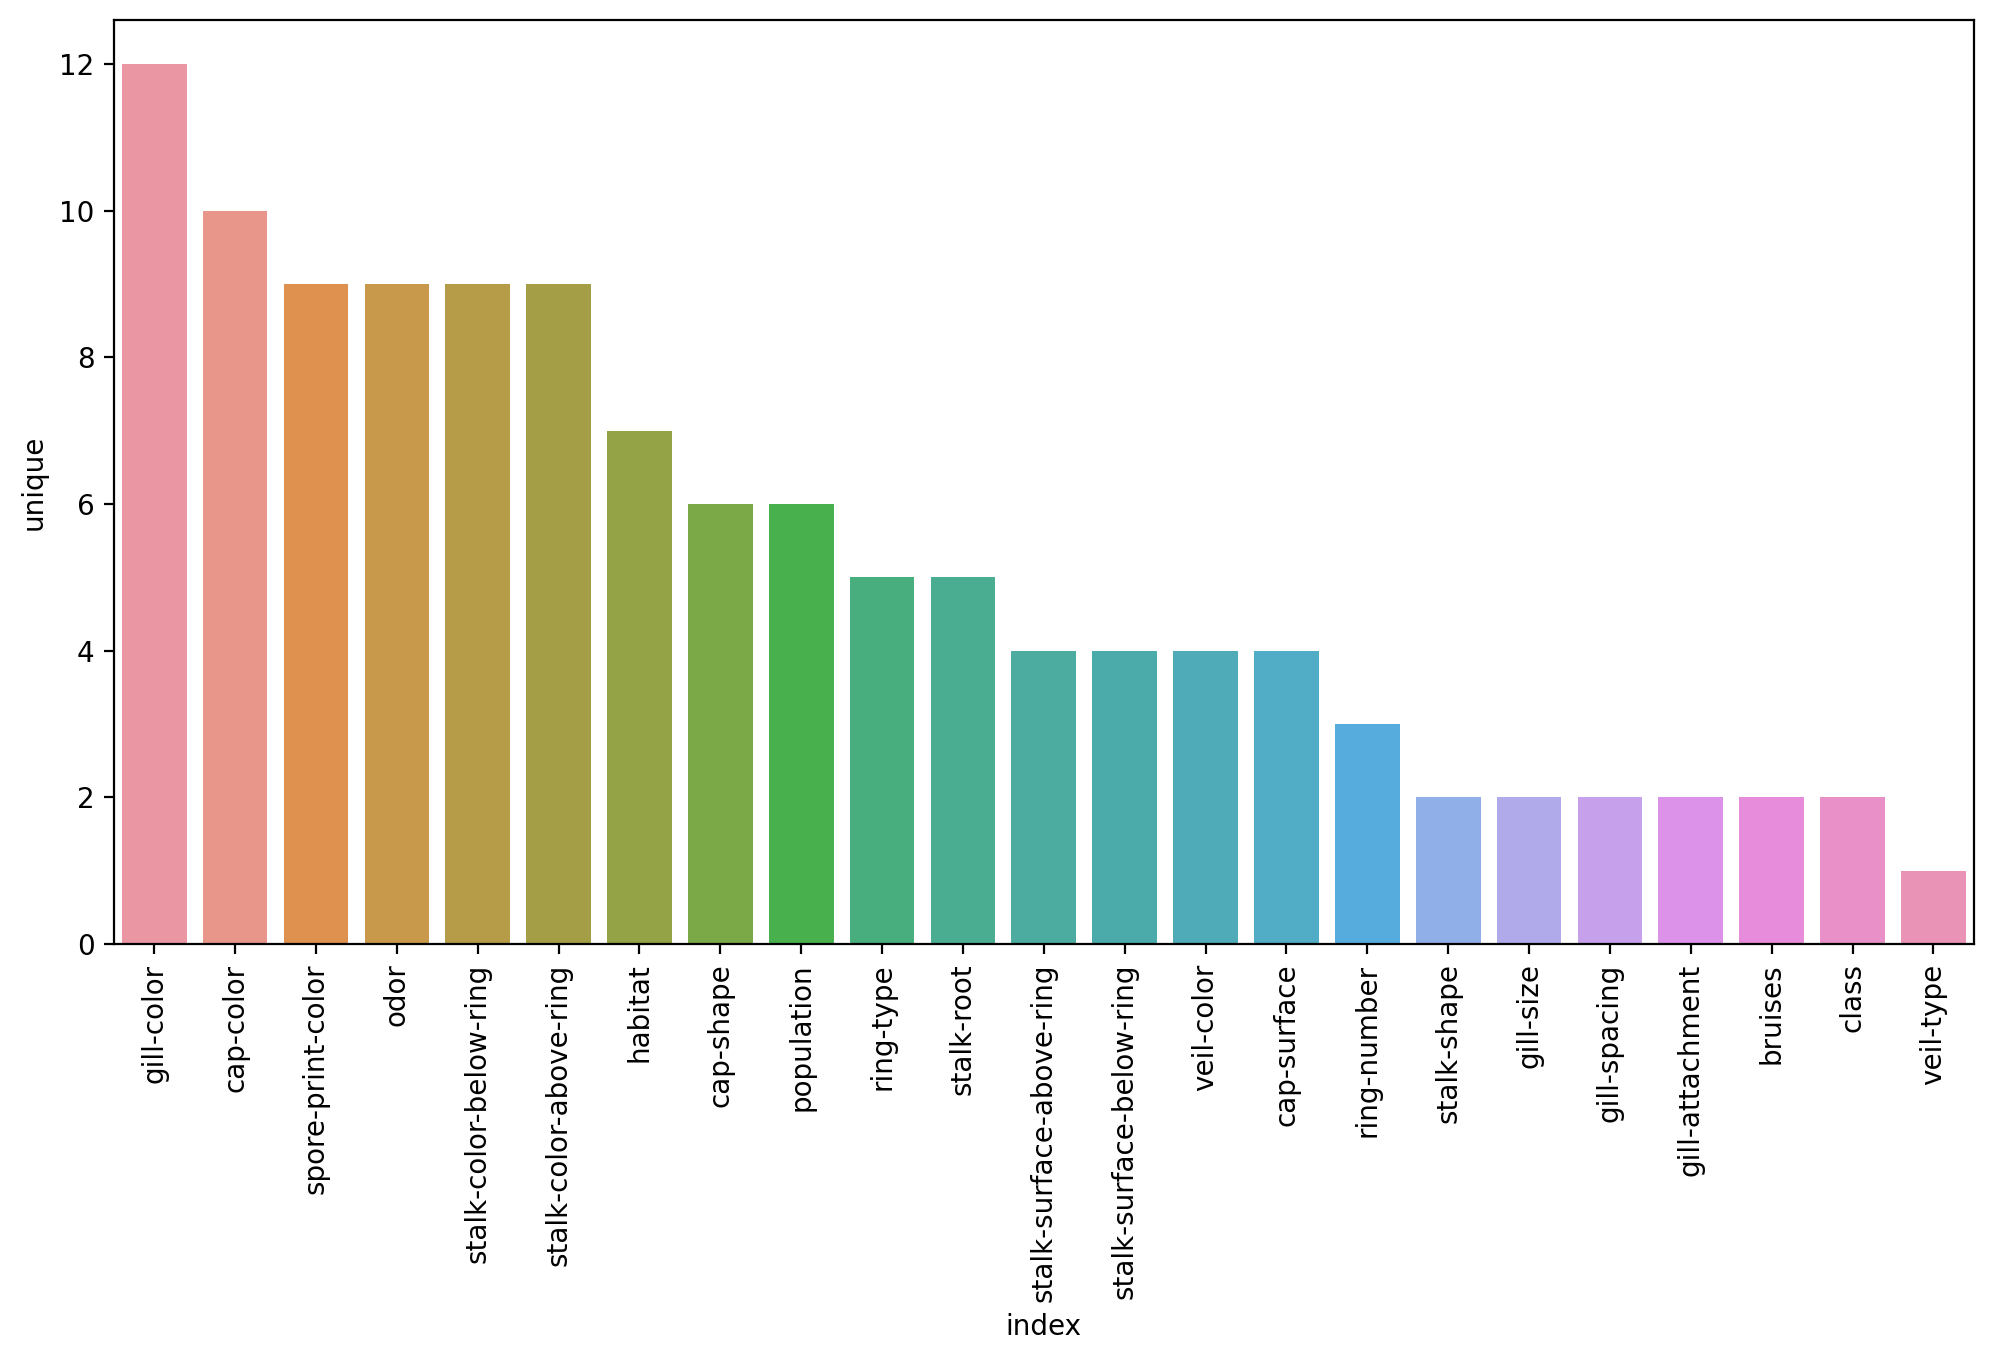

In [27]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique',ascending=False),x='index',y='unique')
plt.xticks(rotation=90);

# Train Test Split

In [14]:
X = df.drop('class',axis=1)
X = pd.get_dummies(X,drop_first=True)
y= df['class']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Modeling and Evaluation

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
#For general guideline for features people should look out for when picking mushrooms, we're using 1 estimator to get one feature
model = AdaBoostClassifier(n_estimators=1)

In [30]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [33]:
predict = model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

In [43]:
def report_model(model,X_test,y_test,predict):
    print(classification_report(y_test,predict))
    print('\n')
    print(confusion_matrix(y_test,predict))
    print('\n')
    print(accuracy_score(y_test,predict))
    print('\n')
    plot_confusion_matrix(model,X_test,y_test)
    

              precision    recall  f1-score   support

           e       0.96      0.80      0.87      1400
           p       0.81      0.96      0.88      1281

    accuracy                           0.88      2681
   macro avg       0.89      0.88      0.88      2681
weighted avg       0.89      0.88      0.88      2681



[[1116  284]
 [  46 1235]]


0.8769116001491981




C:\Users\abhis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


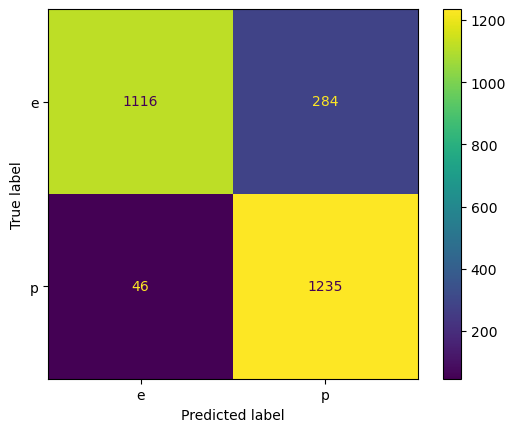

In [45]:
report_model(model,X_test,y_test,predict)

In [46]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
model.feature_importances_.argmax()

22

In [48]:
# odor_n means no odor
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

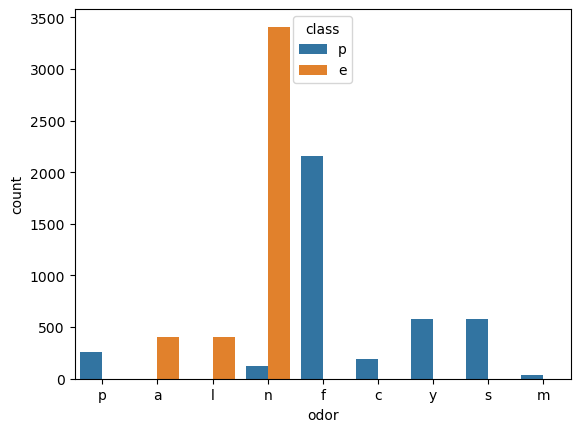

In [51]:
sns.countplot(data=df,x='odor',hue='class')

# Analyzing performance now by adding more weak learners

In [69]:
len(X.columns)

95

In [70]:
error = []
for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    err = 1 - accuracy_score(y_test,predict)
    error.append(err)

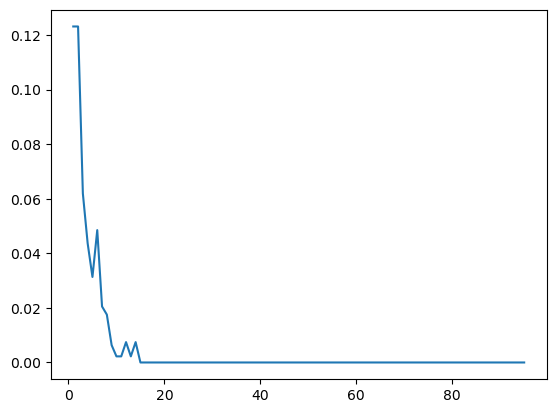

In [71]:
plt.plot(range(1,96),error)

In [72]:
model

AdaBoostClassifier(n_estimators=95)

In [73]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.02105263, 0.        , 0.02105263, 0.03157895, 0.04210526,
       0.        , 0.        , 0.07368421, 0.02105263, 0.        ,
       0.        , 0.        , 0.10526316, 0.06315789, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02105263, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03157895, 0.        , 0.        , 0.     

In [74]:
features = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [80]:
features = features[features['Importance']>0].sort_values('Importance',ascending=False)
features.head()

,Importance
spore-print-color_w,0.178947
gill-spacing_w,0.105263
population_c,0.094737
odor_n,0.073684
stalk-color-below-ring_n,0.063158


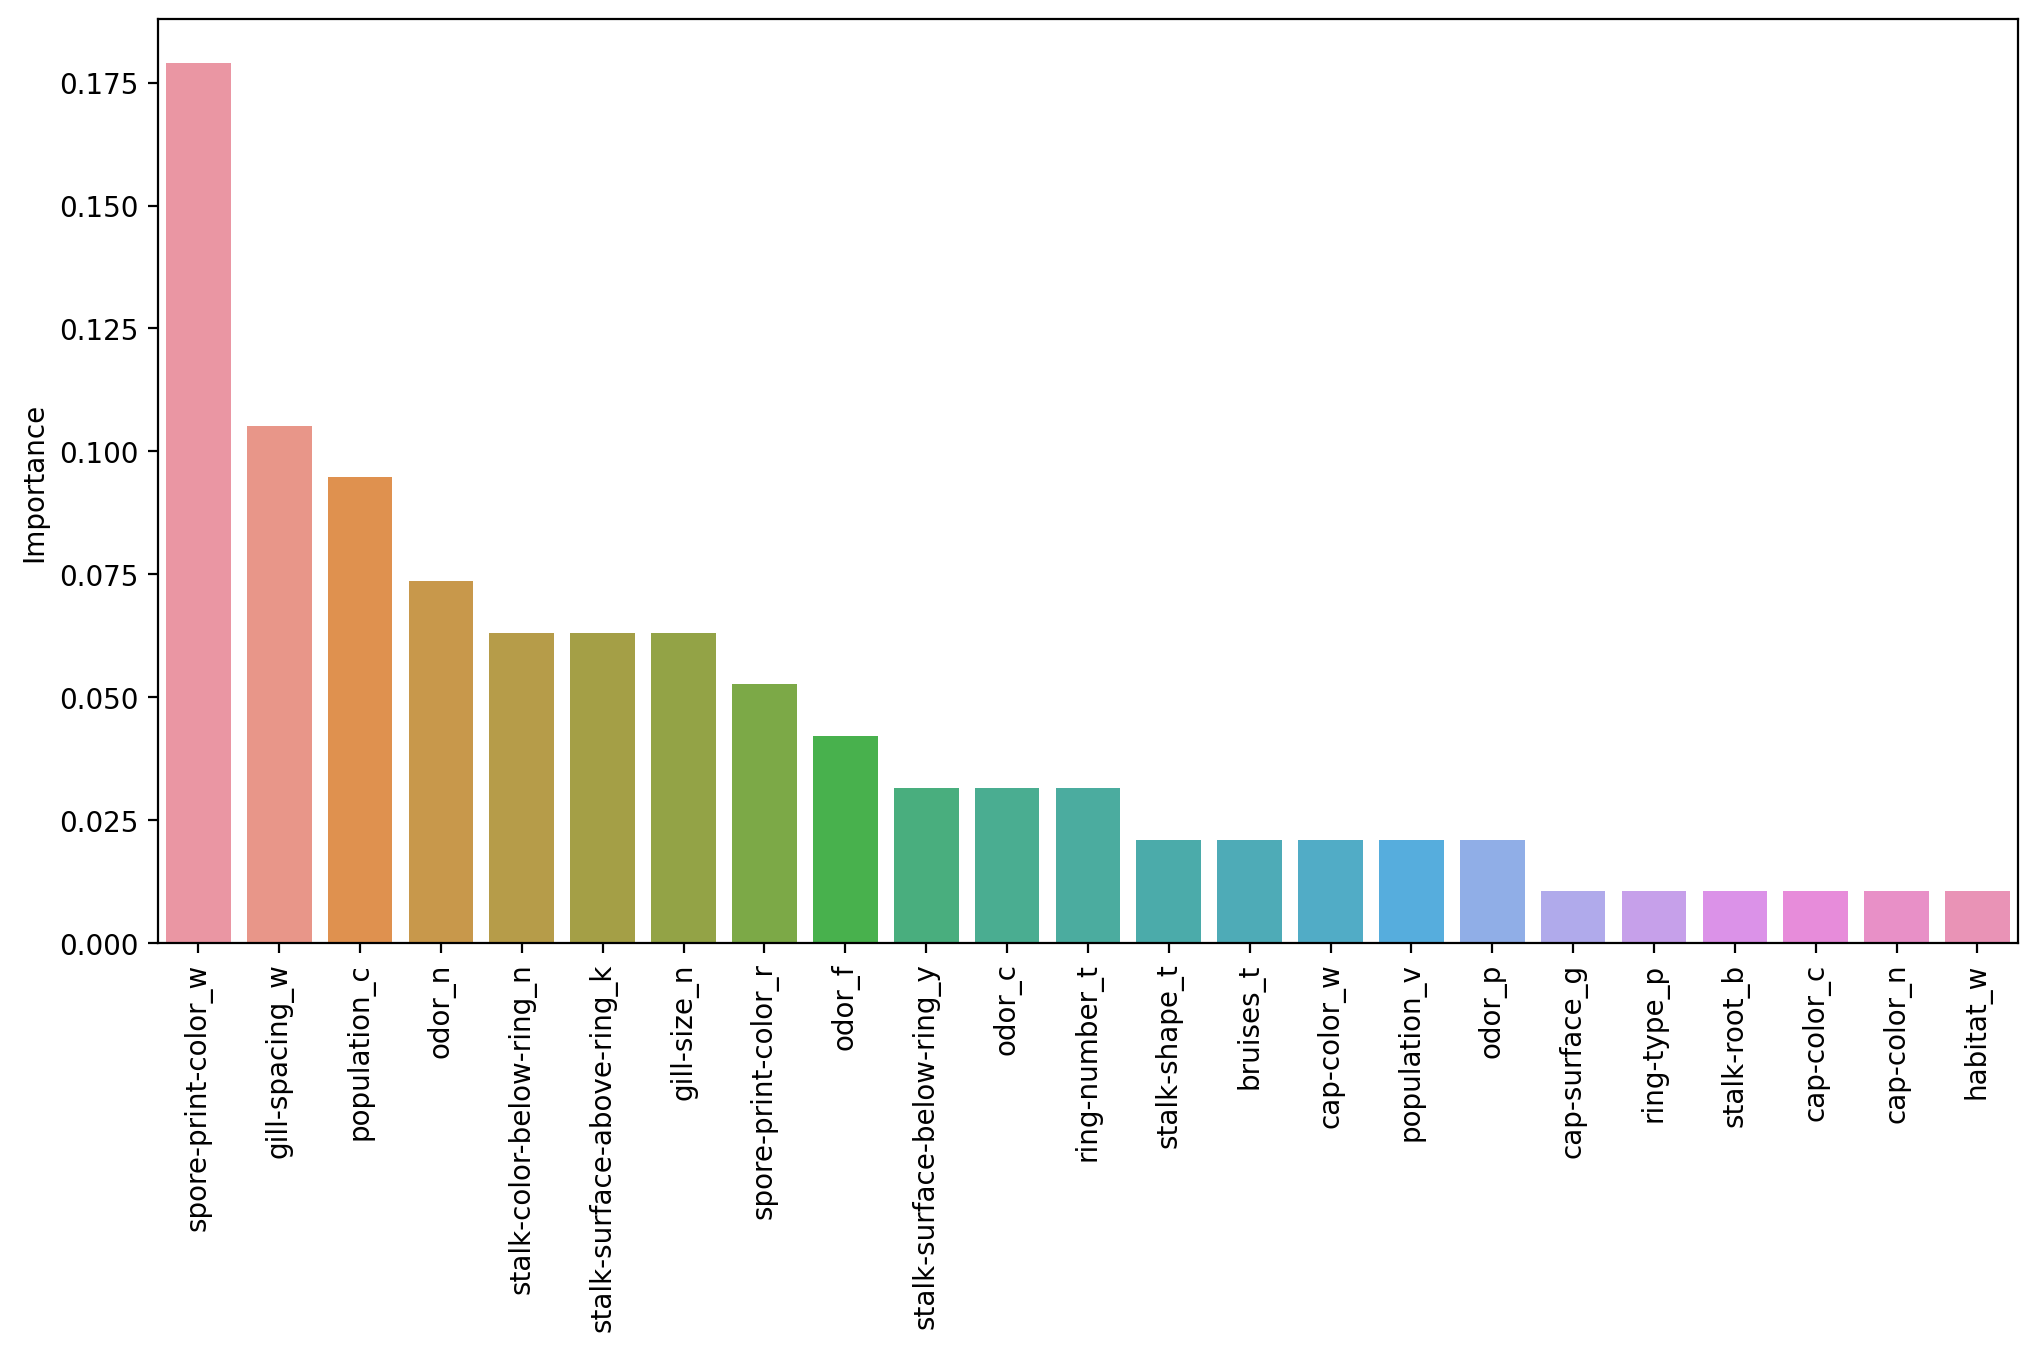

In [87]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(data=features,x=features.index,y=features['Importance'])
plt.xticks(rotation=90);

# Grid Search

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
n_estimators = []
for i in range(1,30):
    n_estimators.append(i)

In [57]:
param = {'n_estimators':n_estimators}

In [58]:
model = AdaBoostClassifier()

In [60]:
grid = GridSearchCV(model,param)

In [61]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29]})

In [62]:
grid.best_params_

{'n_estimators': 20}

In [66]:
predict = grid.predict(X_test)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1400
           p       1.00      1.00      1.00      1281

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



[[1400    0]
 [   0 1281]]


1.0




C:\Users\abhis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


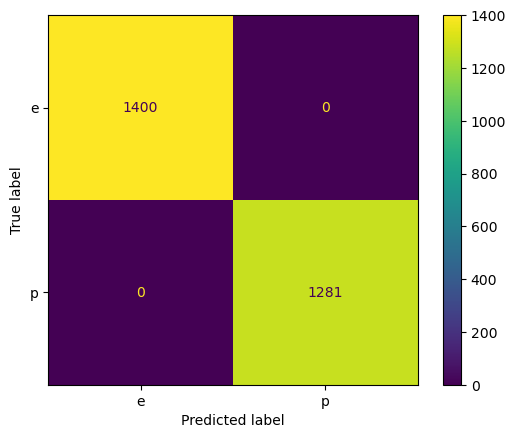

In [67]:
report_model(grid,X_test,y_test,predict)

# Trying with Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
model = RandomForestClassifier()

In [96]:
n_estimators=[]
for i in range(1,125):
    n_estimators.append(i)

In [97]:
n_estimators.append(200)

In [99]:
params = {'n_estimators': n_estimators}

In [100]:
grid = GridSearchCV(model,params)

In [101]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [102]:
grid.best_params_

{'n_estimators': 3}

In [109]:
predict = grid.predict(X_test)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1400
           p       1.00      1.00      1.00      1281

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



[[1400    0]
 [   0 1281]]


1.0




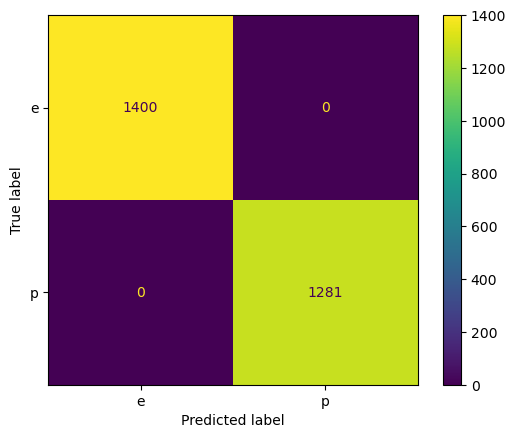

In [110]:
report_model(grid,X_test,y_test,predict)

In [105]:
error = []
for n in range(1,65):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    err = 1 - accuracy_score(y_test,predict)
    error.append(err)

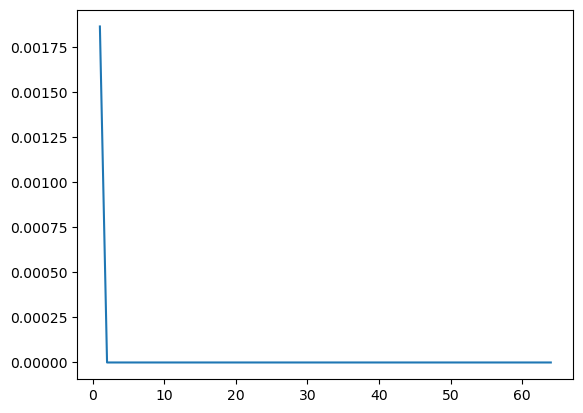

In [107]:
plt.plot(range(1,65),error)